# Avance 1. Análisis exploratorio de datos
# Clasificación de Texto para Requerimientos Aeroespaciales

	
Nombre	Matrícula
Julio César Lynn Jiménez	A01793660


In [1]:
import pandas as pd
df = pd.read_excel('./DATASETS/1_master_synth.xlsx')
df.head()

,Type,Identity,Text,A2-Unambiguous,A4-Tolerances,A5-Sources specified,E1
0,ast_adc,HLRS_1747,Massive Data Broadcast shall immediately send ...,1,na,1,1
1,ast_adc,HLRS_6673,Massive Data Broadcast shall place a copied Re...,1,na,1,1
2,ast_adc,HLRS_2470,Massive Data Broadcast shall place a copied Ma...,1,na,1,1
3,ast_adc,HLRS_2467,Massive Data Broadcast shall send the current ...,1,na,na,1
4,ast_adc,HLRS_2468,Massive Data Broadcast shall send the current ...,1,na,na,1


In [2]:
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

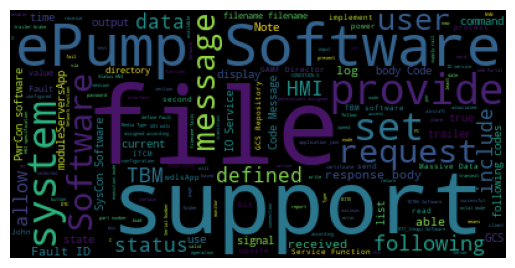

In [49]:

#Instantiate wordcloud object and use method to feed it our corpus
corpus = " ".join(df["Text"])
wc = WordCloud().generate_from_text(corpus)

#Use matplotlib.pyplot to display the fitted wordcloud
#Turn axis off to get rid of axis numbers
plt.imshow(wc)
plt.axis('off')
plt.show()

In [4]:
model_df_label1 = df.query('E1 == 1')
len(model_df_label1)

2408

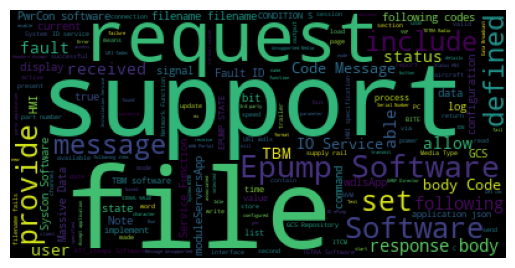

In [5]:
#Instantiate wordcloud object and use method to feed it our corpus
wc = WordCloud().generate_from_text(" ".join(model_df_label1["Text"]))

#Use matplotlib.pyplot to display the fitted wordcloud
#Turn axis off to get rid of axis numbers
plt.imshow(wc)
plt.axis('off')
plt.show()

In [6]:
model_df_label0 = df.query('E1 == 0')
len(model_df_label0)

1472

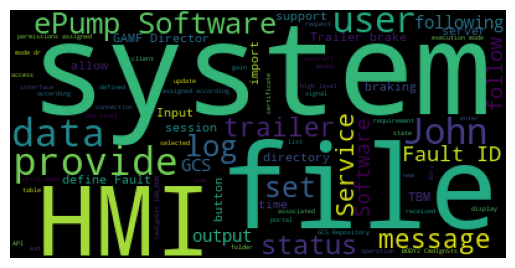

In [7]:
#Instantiate wordcloud object and use method to feed it our corpus
wc = WordCloud().generate_from_text(" ".join(model_df_label0["Text"]))

#Use matplotlib.pyplot to display the fitted wordcloud
#Turn axis off to get rid of axis numbers
plt.imshow(wc)
plt.axis('off')
plt.show()

In [30]:
import nltk
from nltk.corpus import stopwords
 
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\julio\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [43]:
nltk_words = stopwords.words('english')


cloud_stopwords = [*nltk_words, 'support', 'software', 'request', 'file', 'system', 'john', 'shall', 'data', 'fault', 'trailer','break','service']

In [44]:
#A function to generate the word cloud from text
def generate_wordcloud(data, title):
    cloud = WordCloud(width=400,
                      height=330,
                      max_words=150,
                      # colormap='tab20c',
                      stopwords=cloud_stopwords,
                      collocations=False).generate_from_text(data)
    plt.figure(figsize=(10,8))
    plt.imshow(cloud)
    plt.axis('off')
    plt.title(title, fontsize=13)
    plt.show()

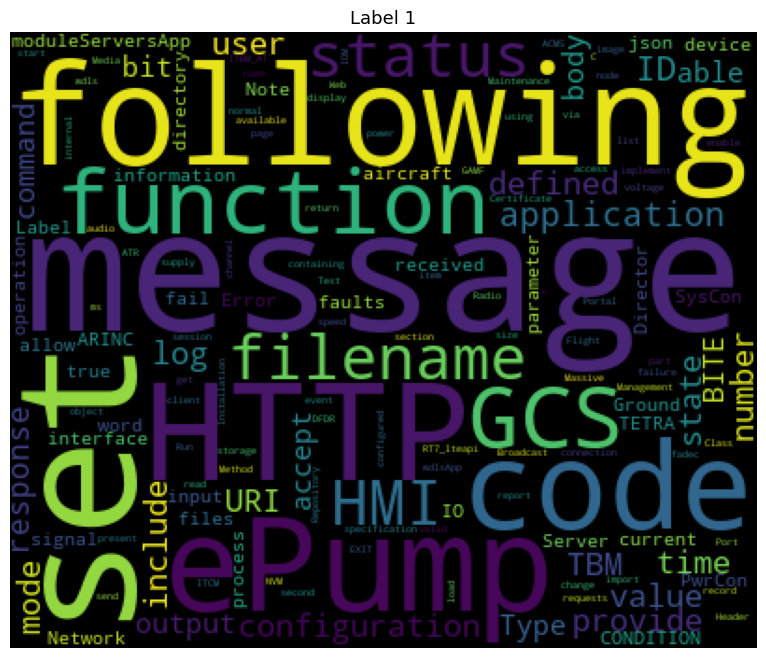

In [45]:
#Use the function to generate the word cloud
generate_wordcloud(" ".join(model_df_label1["Text"]), 'Label 1')

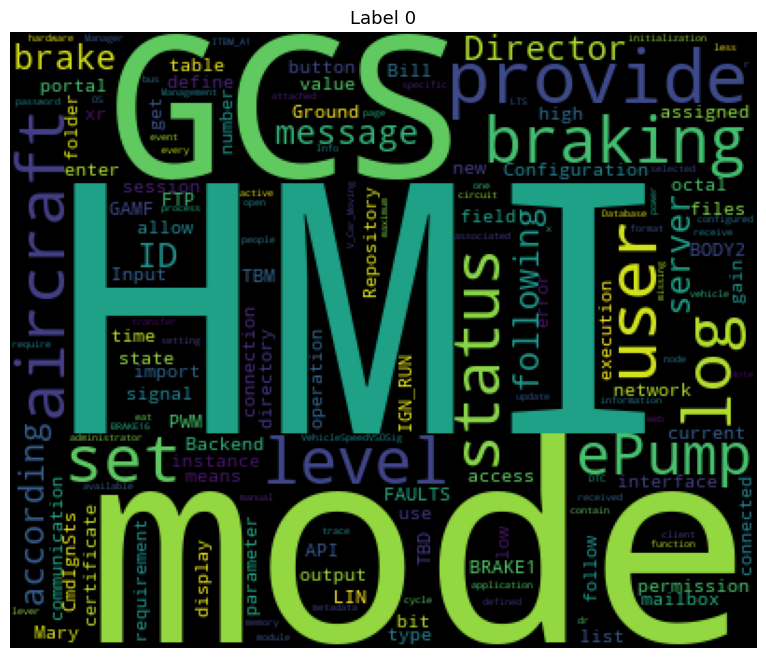

In [46]:
#Use the function to generate the word cloud
generate_wordcloud(" ".join(model_df_label0["Text"]), 'Label 0')

In [58]:
import nltk
from nltk.probability import FreqDist

In [70]:
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\julio\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [73]:
tokenizer = RegexpTokenizer(r'\w+')

fdist = FreqDist()
for sentence in sent_tokenize(corpus.lower()):
    for word in tokenizer.tokenize(sentence):
        if word not in cloud_stopwords:
            fdist[word] += 1


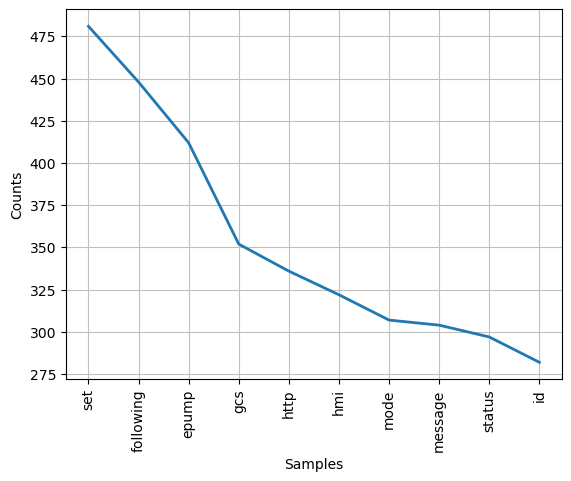

In [81]:
fdist.plot(10, cumulative=False)
plt.show()